In [0]:
import numpy as np
import math
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 ship


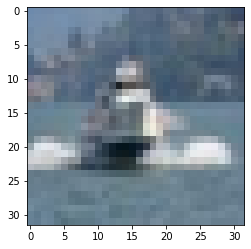

In [4]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#Let us show some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [5]:
#getting the x(2d matrix of 50000*3072, input images), and y(1*3072, output label);
tmpTrain = trainloader.dataset.data # shape of 50000*32*32*3 need to transform to 50000*3072
x,y1,y2,y3 = tmpTrain.shape
trainX = np.zeros([x, y1*y2*y3])
tmpTrainY = trainloader.dataset.targets
trainY = np.zeros([len(tmpTrainY), len(classes)])
for i in range(len(tmpTrainY)):
  trainY[i][tmpTrainY[i]] = 1
tmpTest = testloader.dataset.data # shape of 10000*32*32*3 need to transform to 10000*3072
xx, y4, y5, y6 = tmpTest.shape
testY = testloader.dataset.targets
testX = np.zeros([xx, y4*y5*y6])
for i in range(x):
  trainX[i] = tmpTrain[i].flatten()

trainX = trainX / np.linalg.norm(trainX) 
for j in range(xx):
  testX[j] = tmpTest[j].flatten()

testX = testX / np.linalg.norm(testX)

print("the shape of matrix trainX" + str(trainX.shape))
print("the size of trainY " + str(trainY.shape))
print("the shape of matrix testX" + str(testX.shape))
print("the size of testY " + str(len(testY)))
print(trainX[15])




the shape of matrix trainX(50000, 3072)
the size of trainY (50000, 10)
the shape of matrix testX(10000, 3072)
the size of testY 10000
[5.90271027e-05 9.91655325e-05 1.36352607e-04 ... 9.56239063e-05
 1.09200140e-04 1.19234747e-04]


In [0]:
#activation functions

def relu(x):
  N, D = x.shape
  ans = np.zeros([N,D])
  for i in range(N):
    for j in range(D):
      if x[i][j] > 0:
        ans[i][j] = x[i][j]
      else:
        ans[i][j] = 0
  return ans

def sigmoid(x):
  N, D = x.shape
  ans = np.zeros([N,D])
  for i in range(N):
    for j in range(D):
      try:
        ans[i][j] = 1/(1+math.exp(-x[i][j]))
      except OverflowError:
        if(x[i][j])>0:
          ans[i][j] = 1
        else:
          ans[i][j] = 0
  return ans


In [170]:
#define weights for different layers, put them in a list called Ws, each weight has a shape of size(l-1)*size(l)
layerNumber = [1024,200,40] #number of hidden layers and number of nodes in each layer
AV = relu #activation function that we use 
Ws = []
N,D = trainX.shape
start = D
N,DD =trainY.shape
end = layerNumber[0]
w = np.random.randn(start, end)*0.01
for i in range(start):
  for j in range(end):
    w[i][j] = 0.05
Ws.append(w)
for i in range(len(layerNumber)):
  start = layerNumber[i]
  if i+1 == len(layerNumber):
    end = DD
  else:
    end = layerNumber[i+1]
  w = np.random.randn(start, end)*0.01
  for i in range(start):
    for j in range(end):
      w[i][j] = 0.05
  print(w)
  Ws.append(w)

[[0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 ...
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]]
[[0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 ...
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]]
[[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.

In [0]:
Zs = [] #hidden layers

def getYhead(X):
  Y = []
  N,D = X.shape
  Zs.clear()
  for layer in layerNumber:
    Zs.append(np.zeros([N,layer]))
  Yhead = np.zeros([N, len(classes)])
  tmp = X
  for i in range(len(Ws)-1):
    NN,DD = tmp.shape
    tmp = AV(np.dot(tmp, Ws[i])) #Doing activation function for the Zs in layer
    Zs[i] = tmp
  Y = sigmoid(np.dot(tmp, Ws[len(Ws)-1])) #Doing sigmoid for final layer since it is binary classification
  return Y



In [0]:
#Cost of one training result
def cost(Y1, Y2):
  total = 0.0
  for i in range(len(Y1)):
    value = (Y1[i]-Y2[i])*(Y1[i]-Y2[i])
    total = total + value
  return total


#Average cost of all training result
def averageCost(Y1, Y2):
  N,D = Y1.shape
  total = 0.0
  for i in range(N):
    total = total + cost(Y1[i],Y2[i])
  return total/N

In [174]:


def gradient(X, Y):
  N,D = X.shape
  Yh = getYhead(X)
  print("Average cost so far " + str(averageCost(Yh, Y)))
  dY = 2*(Yh - Y)
  dZnext =dY
  WsReversed = Ws.copy()
  ZsReversed = Zs.copy()
  WsReversed.reverse() #reverse them since we need to calculate the dw from last layer to the first layer
  ZsReversed.reverse()
  dWs =[]
  w = WsReversed[0]
  z = ZsReversed[0]
  dW = np.dot(z.T, dZnext*Yh*(1-Yh))/N
  #Probably the problem come from here, I am trying to calculate the dWeight between last hidden layer and final layer
  #now z is the last hidden layer, Yh is the final answer, in the video, derivative of w = al-1*(derivative of sigmoid)*dy
  #al-1 is last hidden layer, Yh*(1-Yh) is the derivative of sigmoid, and dzNext is dy, however if Yh is all zero them dW
  #would be zero and if will keeps like that, and I was like what???
  dZnext = np.dot(dZnext*Yh*(1-Yh), w.T)
  dWs.append(dW)
  for i in range(1, len(WsReversed)):
    w = WsReversed[i]
    zPrevious = ZsReversed[i-1]
    if i >= len(ZsReversed):
      z = X.copy()
    else:
      z = ZsReversed[i]
    Zn, Zd = zPrevious.shape
    dW = np.dot(z.T, dZnext)/N
    dZnext = np.dot(dZnext, w.T)
    dWs.append(dW)
  dWs.reverse()
  return dWs

def fit(X, Y, lr, decay, eps, maxiterations, bsize):
  N,D = X.shape
  dW = np.inf*np.ones_like(Ws[len(Ws)-1])
  iter = 0
  while np.linalg.norm(dW) > eps and iter<maxiterations:
    minibatch = np.random.randint(N, size=(bsize))
    g = gradient(X[minibatch,:], Y[minibatch,:])
    for i in range(len(Ws)):
      Ws[i] = Ws[i]-lr*g[i]
    dW = g[len(Ws)-1]
    lr *= (1. / (1. + decay * iter))
    #print(lr)
    iter = iter+1

def getBiggestY(Y): 
  N,D = Y.shape
  result = np.zeros([N])
  for i in range(N):
    biggest = 0
    biggestNum = 0
    for j in range(D):
      if Y[i][j]>biggest:
        biggestNum = j
        biggest = Y[i][j]
      result[i] = j
  return result

def predict(testX, testY):
  print("predicting ...")
  yHead = getYhead(testX)
  yResult = getBiggestY(yHead)
  totalRight = 0.0
  for i in range(len(testY)):
    if(yResult[i] == testY[i]):
      totalRight = totalRight+1
  return totalRight/len(testY)


fit(trainX, trainY,  1 ,0.001, 0.00001, 10000, 1000)
print(predict(testX, testY))


Average cost so far 0.9999257705118806
Average cost so far 0.999934226100157
Average cost so far 0.9996902278680591
Average cost so far 0.999828444089183
Average cost so far 0.9996063285790643
Average cost so far 0.9996779471616025
Average cost so far 0.9997566344689051
Average cost so far 0.9997275131330648
Average cost so far 0.9998899367949287
Average cost so far 0.9997137373202406
Average cost so far 0.9998234757947647
Average cost so far 0.9998181641721174
Average cost so far 0.9994953459759045
Average cost so far 0.9998298481052799
Average cost so far 0.9995823013323831
Average cost so far 0.999688256938348
Average cost so far 0.9997108470111674
Average cost so far 0.9996787567096422
Average cost so far 0.9993272212319798
Average cost so far 0.9995067110593563
Average cost so far 0.9996209504041942
Average cost so far 0.9996918563334414
Average cost so far 0.9996557427118641
Average cost so far 0.9996021464930026
Average cost so far 0.9995425198109079
Average cost so far 0.999091

KeyboardInterrupt: ignored